In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
title = pd.read_csv("../datas/prepared/title.basics.csv", index_col=0, encoding="ISO-8859-1")
name = pd.read_csv("../datas/prepared/name.csv", index_col=0, encoding="ISO-8859-1")
principal = pd.read_csv("../datas/prepared/principal.csv", index_col=0, encoding="ISO-8859-1")

actor = pd.read_csv("../datas/prepared/final_actor_with_clusters.csv", index_col=0)
writer = pd.read_csv("../datas/prepared/final_writer_with_clusters.csv", index_col=0)
director = pd.read_csv("../datas/prepared/final_director_with_clusters.csv", index_col=0)

# Movie

Previously, we reduced the number of actors/ writer/producter in order to have memory for the computation of distances and do the clustering. Now, we can play with tables in order to generate the final dataset.

In [4]:
title.info()

<class 'pandas.core.frame.DataFrame'>
Index: 200692 entries, tt0000335 to tt8156742
Data columns (total 9 columns):
primaryTitle      200692 non-null object
originalTitle     200691 non-null object
startYear         200691 non-null float64
runtimeMinutes    200692 non-null int64
genres            186874 non-null object
averageRating     200692 non-null float64
numVotes          200692 non-null int64
directors         200692 non-null object
writers           200692 non-null object
dtypes: float64(2), int64(2), object(5)
memory usage: 15.3+ MB


In [5]:
principal_redux_actor = principal[principal.nconst.isin(actor.index)]
title_redux_actor = title[title.index.isin(principal_redux_actor.index)]
title_redux_actor = title_redux_actor[title_redux_actor.genres.notnull()]

In [6]:
title_redux_actor.info()

<class 'pandas.core.frame.DataFrame'>
Index: 86937 entries, tt0001482 to tt8092252
Data columns (total 9 columns):
primaryTitle      86937 non-null object
originalTitle     86937 non-null object
startYear         86937 non-null float64
runtimeMinutes    86937 non-null int64
genres            86937 non-null object
averageRating     86937 non-null float64
numVotes          86937 non-null int64
directors         86937 non-null object
writers           86937 non-null object
dtypes: float64(2), int64(2), object(5)
memory usage: 6.6+ MB


### Handling genres

In [7]:
genres = title_redux_actor["genres"].str.get_dummies(sep=",")

In [10]:
for category, count in zip(genres.columns, genres.as_matrix().sum(axis=0)):
    print(category, count)

Action 12154
Adventure 6554
Animation 1458
Biography 2479
Comedy 27613
Crime 10899
Drama 46918
Family 3464
Fantasy 2912
Film-Noir 747
History 2249
Horror 5570
Musical 3949
Mystery 4318
Romance 13583
Sci-Fi 2618
Sport 1018
Thriller 9585
War 2375
Western 1816


In [9]:
genres["Musical"] = genres[["Musical", "Music"]].max(axis=1)

genres.drop(["Music"], axis=1, inplace=True)  # duplicates
genres.drop(["Game-Show", "Documentary", "News", "Reality-TV", "Adult", "Talk-Show"], axis=1, inplace=True)  # filtering

In [12]:
row_to_remove = np.where(genres.sum(axis=1) == 0)[0]
genres.drop(genres.index[row_to_remove], axis=0, inplace=True)
title_redux_actor.drop(title_redux_actor.index[row_to_remove], axis=0, inplace=True)

In [15]:
title_redux_actor.drop(["genres"], axis=1, inplace=True)  # original col
title_redux_actor = pd.concat([title_redux_actor, genres], axis=1)

In [17]:
title_redux_actor.head()

,primaryTitle,originalTitle,startYear,runtimeMinutes,averageRating,numVotes,directors,writers,Action,Adventure,...,History,Horror,Musical,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western
tconst,,,,,,,,,,,,,,,,,,,,,
tt0001482,As in a Looking Glass,As in a Looking Glass,1911.0,65535,5.5,23,nm0000428,nm0377289,0,0,...,0,0,0,0,0,0,0,0,0,0
tt0002423,Madame DuBarry,Madame DuBarry,1919.0,85,6.9,600,nm0523932,"nm0266183,nm0473134",0,0,...,0,0,0,0,0,0,0,0,0,0
tt0002544,Trädgårdsmästaren,Trädgårdsmästaren,1912.0,65535,6.3,128,nm0803705,nm0830249,0,0,...,0,0,0,0,0,0,0,0,0,0
tt0003014,Ingeborg Holm,Ingeborg Holm,1913.0,96,7.3,755,nm0803705,"nm0472236,nm0803705",0,0,...,0,0,0,0,0,0,0,0,0,0
tt0003037,Fantômas: Juve versus Fantômas,Juve contre Fantômas,1913.0,61,6.8,1126,nm0275421,"nm0019855,nm0275421,nm0816232",0,0,...,0,0,0,0,0,0,0,0,0,0


In [18]:
title_redux_actor.to_csv("../datas/prepared/title_filtered.csv", index=True)

### Handling actors

In [20]:
movie_actor = pd.merge(principal.reset_index(), actor.reset_index()[["nconst", "clusters"]] , on='nconst', how='inner')[["tconst", "nconst", "clusters"]]

In [22]:
movie_actor = pd.concat([movie_actor, pd.get_dummies(movie_actor["clusters"], prefix="Cluster")], axis=1)
movie_actor.drop(["clusters", "nconst"], axis=1, inplace=True)

In [24]:
movie_actor = movie_actor.groupby("tconst").sum()

In [25]:
movie_actor.head()

,Cluster_0,Cluster_1,Cluster_2,Cluster_3,Cluster_4,Cluster_5,Cluster_6,Cluster_7,Cluster_8,Cluster_9
tconst,,,,,,,,,,
tt0001482,1,0,0,0,0,0,0,0,0,0
tt0001889,1,0,0,0,0,0,0,0,0,0
tt0002234,2,0,0,0,0,0,0,0,0,0
tt0002423,1,0,0,0,0,0,0,0,0,0
tt0002514,1,0,0,0,0,0,0,0,0,0


In [26]:
movie_with_actor_bucket = pd.merge(title_redux_actor.reset_index(), movie_actor.reset_index(), on='tconst', how='inner')
movie_with_actor_bucket = movie_with_actor_bucket.set_index("tconst")

In [6]:
movie_with_actor_bucket.info()

<class 'pandas.core.frame.DataFrame'>
Index: 85034 entries, tt0001482 to tt8092252
Data columns (total 38 columns):
primaryTitle      85034 non-null object
originalTitle     85034 non-null object
startYear         85034 non-null float64
runtimeMinutes    85034 non-null int64
averageRating     85034 non-null float64
numVotes          85034 non-null int64
directors         85034 non-null object
writers           85034 non-null object
Action            85034 non-null int64
Adventure         85034 non-null int64
Animation         85034 non-null int64
Biography         85034 non-null int64
Comedy            85034 non-null int64
Crime             85034 non-null int64
Drama             85034 non-null int64
Family            85034 non-null int64
Fantasy           85034 non-null int64
Film-Noir         85034 non-null int64
History           85034 non-null int64
Horror            85034 non-null int64
Musical           85034 non-null int64
Mystery           85034 non-null int64
Romance           

In [31]:
movie_with_actor_bucket.to_csv("../datas/prepared/title_filtered.csv", index=True)

# Duration

In [5]:
movie_with_actor_bucket = pd.read_csv("../datas/prepared/title_filtered.csv", index_col=0, encoding="ISO-8859-1")

In [7]:
movie_with_actor_bucket.runtimeMinutes.value_counts()

65535    7035
90       5128
95       3159
100      2923
92       2320
93       2242
85       2173
88       2008
94       1990
91       1987
96       1987
98       1958
105      1944
97       1863
89       1735
87       1663
86       1559
80       1549
110      1510
99       1446
102      1442
103      1294
104      1280
101      1269
84       1250
83       1109
82       1092
106      1078
108      1043
107      1017
         ... 
308         1
245         1
246         1
311         1
248         1
251         1
317         1
295         1
230         1
357         1
218         1
271         1
272         1
209         1
467         1
277         1
215         1
279         1
344         1
410         1
229         1
283         1
540         1
255         1
287         1
288         1
4320        1
226         1
420         1
222         1
Name: runtimeMinutes, Length: 234, dtype: int64

In [12]:
movie_with_actor_bucket[ (movie_with_actor_bucket.runtimeMinutes > 400) & (movie_with_actor_bucket.runtimeMinutes < 65000) ]

,primaryTitle,originalTitle,startYear,runtimeMinutes,averageRating,numVotes,directors,writers,Action,Adventure,...,Cluster_0,Cluster_1,Cluster_2,Cluster_3,Cluster_4,Cluster_5,Cluster_6,Cluster_7,Cluster_8,Cluster_9
tconst,,,,,,,,,,,,,,,,,,,,,
tt0063794,War and Peace,Voyna i mir,1966.0,427,7.9,5156,nm0094083,"nm0094083,nm0813537,nm0866243",0,0,...,0,0,0,0,0,0,0,0,0,4
tt0090052,The Satin Slipper,Le soulier de satin,1985.0,410,7.1,126,nm0210701,"nm0165227,nm0210701",0,0,...,1,0,0,0,0,0,0,0,0,0
tt0111341,Satantango,Sátántangó,1994.0,450,8.5,7156,nm0850601,"nm0470004,nm0896902,nm0229569,nm0586280,nm0850601",0,0,...,1,0,0,0,0,0,0,0,0,2
tt0270523,The Movie Orgy,The Movie Orgy,1968.0,420,8.1,83,nm0001102,\N,0,0,...,0,0,0,0,1,0,0,0,0,2
tt0424062,Evolution of a Filipino Family,Ebolusyon ng isang pamilyang Pilipino,2004.0,540,8.0,204,nm0225010,nm0225010,0,0,...,0,0,0,0,0,0,0,0,0,1
tt5275892,O.J.: Made in America,O.J.: Made in America,2016.0,467,9.0,13101,nm1554601,\N,0,0,...,0,0,0,1,0,0,0,0,0,0


In [11]:
movie_with_actor_bucket.runtimeMinutes[ movie_with_actor_bucket.runtimeMinutes == 4320 ] = 72

C:\python36\envs\machine_learning\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


For strange duration, few checks have been done and time is correct. Only "Writing on Snow" has a duration of 4320 = 72 days instead of 72 minutes. Now let's check movies with no time ( = 65535 ).

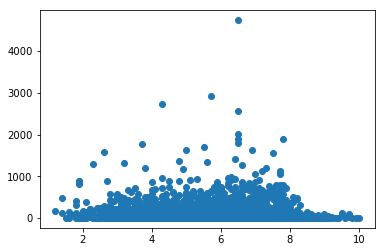

In [13]:
X = movie_with_actor_bucket[ movie_with_actor_bucket.runtimeMinutes == 65535 ]
plt.scatter(X.averageRating, X.numVotes)
plt.show()

Maybe we can reduce this number of movie based on a rule vote/note. Let's check the histogramme of note * log(nb_vote for example.

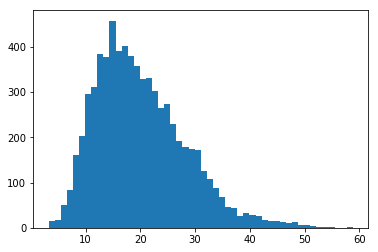

In [36]:
y = X.averageRating * np.log(X.numVotes)
plt.hist(y, bins=50)
plt.show()

Let set where are movie in a score above 30.

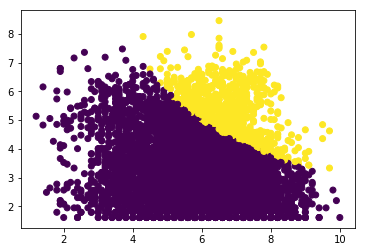

In [40]:
plt.scatter(X.averageRating, np.log(X.numVotes), c=(y > 30))
plt.show()

This is not good as we lose some movies with a score above 8. We can manually create a lin reg to keep all movies above 6 with lot votes and 8 with few votes. The equation is -8/3x+21. We can play with the b to keep more or less movies. 

Selected movies :  1180


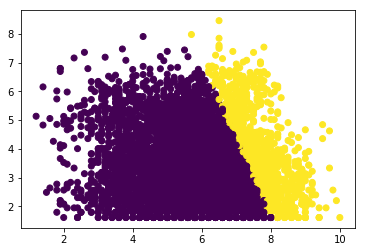

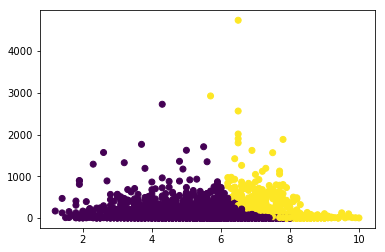

In [54]:
y = - 8/3 * X.averageRating + 23 - np.log(X.numVotes)
print( "Selected movies : ", (y < 0).sum())
plt.scatter(X.averageRating, np.log(X.numVotes), c=(y < 0))
plt.show()
plt.scatter(X.averageRating, X.numVotes, c=(y < 0))
plt.show()

In [59]:
index_to_remove = y[y > 0].index

In [63]:
movie_with_actor_bucket = movie_with_actor_bucket[~movie_with_actor_bucket.index.isin(index_to_remove)]

In [64]:
movie_with_actor_bucket.to_csv("../datas/prepared/title_filtered.csv", index=True)

# Year

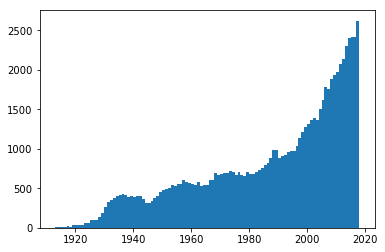

In [66]:
movie_with_actor_bucket.startYear = movie_with_actor_bucket.startYear.astype(int)
bins = max(movie_with_actor_bucket.startYear) - min(movie_with_actor_bucket.startYear)
plt.hist(movie_with_actor_bucket.startYear, bins = bins)
plt.show()

We have to keep in mind that we have to reducte the number of movie kept for the rendering to around 10k. This more than that, the rendering will be impossible. as we did previously, we could for example remove all movies older than 20 years with a condition of note/votes for example. This is require dto keep movies like Titanic for example. This will be digged at the end if required.

# Director

We will do exactly the same as what we dit for actor but with director and writer.

In [146]:
movie_with_actor_bucket = pd.read_csv("../datas/prepared/title_filtered.csv", index_col=0, encoding="ISO-8859-1")

In [149]:
def to_cluster(x):
    return ",".join([ str(mapping.get(nconst, 255)) for nconst in x.split(",")])

mapping = {x: y for x, y in zip(director.index.values, director.clusters.values)}
movie_with_actor_bucket["directors_clusters"] = movie_with_actor_bucket["directors"].apply(to_cluster)

In [150]:
movie_with_actor_bucket.head()

,primaryTitle,originalTitle,startYear,runtimeMinutes,averageRating,numVotes,directors,writers,Action,Adventure,...,Cluster_1,Cluster_2,Cluster_3,Cluster_4,Cluster_5,Cluster_6,Cluster_7,Cluster_8,Cluster_9,directors_clusters
tconst,,,,,,,,,,,,,,,,,,,,,
tt0002423,Madame DuBarry,Madame DuBarry,1919.0,85,6.9,600,nm0523932,"nm0266183,nm0473134",0,0,...,0,0,0,0,0,0,0,0,0,6
tt0003014,Ingeborg Holm,Ingeborg Holm,1913.0,96,7.3,755,nm0803705,"nm0472236,nm0803705",0,0,...,0,0,0,0,0,0,0,0,0,6
tt0003037,Fantômas: Juve versus Fantômas,Juve contre Fantômas,1913.0,61,6.8,1126,nm0275421,"nm0019855,nm0275421,nm0816232",0,0,...,0,0,0,0,0,0,0,0,1,6
tt0003165,Fantômas: The Dead Man Who Killed,Le mort qui tue,1913.0,90,7.0,861,nm0275421,"nm0019855,nm0275421,nm0816232",0,0,...,0,0,0,0,0,0,0,0,1,6
tt0003362,The Sea Wolf,The Sea Wolf,1913.0,70,6.0,5,nm0098376,"nm0098376,nm0518711",0,0,...,0,0,0,0,0,0,0,0,0,255


In [151]:
dir_cluster = movie_with_actor_bucket["directors_clusters"].str.get_dummies(sep=",")

In [152]:
dir_cluster.drop("255", axis=1, inplace=True)

In [153]:
m = dir_cluster.as_matrix()
index_to_remove = np.where(m.sum(axis=1) == 0)[0]

In [154]:
dir_cluster.drop(dir_cluster.index[index_to_remove], axis=0, inplace=True)
movie_with_actor_bucket.drop(movie_with_actor_bucket.index[index_to_remove], axis=0, inplace=True)

In [155]:
movie_with_actor_bucket = pd.concat([movie_with_actor_bucket, dir_cluster], axis=1)

In [156]:
movie_with_actor_bucket.columns = list(movie_with_actor_bucket.columns[:-8])+["Director_{}".format(i) for i in range(8)]

In [157]:
movie_with_actor_bucket.drop(["directors", "directors_clusters"], axis=1, inplace=True)

# writer

In [158]:
mapping = {x: y for x, y in zip(writer.index.values, writer.clusters.values)}
movie_with_actor_bucket["writers_clusters"] = movie_with_actor_bucket["writers"].apply(to_cluster)

In [159]:
movie_with_actor_bucket.head()

,primaryTitle,originalTitle,startYear,runtimeMinutes,averageRating,numVotes,writers,Action,Adventure,Animation,...,Cluster_9,Director_0,Director_1,Director_2,Director_3,Director_4,Director_5,Director_6,Director_7,writers_clusters
tconst,,,,,,,,,,,,,,,,,,,,,
tt0002423,Madame DuBarry,Madame DuBarry,1919.0,85,6.9,600,"nm0266183,nm0473134",0,0,0,...,0,0,0,0,0,0,0,1,0,"0,7"
tt0003014,Ingeborg Holm,Ingeborg Holm,1913.0,96,7.3,755,"nm0472236,nm0803705",0,0,0,...,0,0,0,0,0,0,0,1,0,"255,255"
tt0003037,Fantômas: Juve versus Fantômas,Juve contre Fantômas,1913.0,61,6.8,1126,"nm0019855,nm0275421,nm0816232",0,0,0,...,1,0,0,0,0,0,0,1,0,"0,7,0"
tt0003165,Fantômas: The Dead Man Who Killed,Le mort qui tue,1913.0,90,7.0,861,"nm0019855,nm0275421,nm0816232",0,0,0,...,1,0,0,0,0,0,0,1,0,"0,7,0"
tt0003618,An American Citizen,An American Citizen,1914.0,65535,8.7,13,"nm0205986,nm0753350",0,0,0,...,1,0,0,0,0,0,0,1,0,"255,255"


In [160]:
writer_cluster = movie_with_actor_bucket["writers_clusters"].str.get_dummies(sep=",")

In [161]:
writer_cluster.drop("255", axis=1, inplace=True)

In [162]:
m = writer_cluster.as_matrix()
index_to_remove = np.where(m.sum(axis=1) == 0)[0]
writer_cluster.drop(writer_cluster.index[index_to_remove], axis=0, inplace=True)
movie_with_actor_bucket.drop(movie_with_actor_bucket.index[index_to_remove], axis=0, inplace=True)

In [163]:
writer_cluster.columns = ["Writer_{}".format(i) for i in range(8)]

In [164]:
movie_with_actor_bucket = pd.concat([movie_with_actor_bucket, writer_cluster], axis=1)
movie_with_actor_bucket.drop(["writers", "writers_clusters"], axis=1, inplace=True)

In [165]:
movie_with_actor_bucket.info()

<class 'pandas.core.frame.DataFrame'>
Index: 40499 entries, tt0002423 to tt8088944
Data columns (total 52 columns):
primaryTitle      40499 non-null object
originalTitle     40499 non-null object
startYear         40499 non-null float64
runtimeMinutes    40499 non-null int64
averageRating     40499 non-null float64
numVotes          40499 non-null int64
Action            40499 non-null int64
Adventure         40499 non-null int64
Animation         40499 non-null int64
Biography         40499 non-null int64
Comedy            40499 non-null int64
Crime             40499 non-null int64
Drama             40499 non-null int64
Family            40499 non-null int64
Fantasy           40499 non-null int64
Film-Noir         40499 non-null int64
History           40499 non-null int64
Horror            40499 non-null int64
Musical           40499 non-null int64
Mystery           40499 non-null int64
Romance           40499 non-null int64
Sci-Fi            40499 non-null int64
Sport             40

In [166]:
movie_with_actor_bucket.to_csv("../datas/prepared/final_dataset.csv", index=True)

In [167]:
movie_with_actor_bucket

,primaryTitle,originalTitle,startYear,runtimeMinutes,averageRating,numVotes,Action,Adventure,Animation,Biography,...,Director_6,Director_7,Writer_0,Writer_1,Writer_2,Writer_3,Writer_4,Writer_5,Writer_6,Writer_7
tconst,,,,,,,,,,,,,,,,,,,,,
tt0002423,Madame DuBarry,Madame DuBarry,1919.0,85,6.9,600,0,0,0,1,...,1,0,1,0,0,0,0,0,0,1
tt0003037,Fantômas: Juve versus Fantômas,Juve contre Fantômas,1913.0,61,6.8,1126,0,0,0,0,...,1,0,1,0,0,0,0,0,0,1
tt0003165,Fantômas: The Dead Man Who Killed,Le mort qui tue,1913.0,90,7.0,861,0,0,0,0,...,1,0,1,0,0,0,0,0,0,1
tt0003643,The Avenging Conscience: or 'Thou Shalt Not Kill',The Avenging Conscience: or 'Thou Shalt Not Kill',1914.0,78,6.9,939,0,0,0,0,...,1,0,0,1,0,0,0,0,0,0
tt0003952,Fantômas: The False Magistrate,Le faux magistrat,1914.0,70,6.9,764,0,0,0,0,...,1,0,1,0,0,0,0,0,0,1
tt0004181,Judith of Bethulia,Judith of Bethulia,1914.0,61,7.3,1067,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
tt0004223,The Life of General Villa,The Life of General Villa,1914.0,105,7.0,24,1,1,0,1,...,0,0,0,0,0,0,0,0,0,1
tt0004707,Tillie's Punctured Romance,Tillie's Punctured Romance,1914.0,82,7.1,2934,0,0,0,0,...,1,0,1,0,0,0,0,0,1,0
tt0004972,The Birth of a Nation,The Birth of a Nation,1915.0,195,6.7,19035,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1


# Data Extraction

Now a new Notebook will be created to get more data about those 40000k movies.